# 1 KNN
## 1.1 介绍


### 1.1.1 最近邻算法:
    - 未知样本
        - 所有训练样本的距离.
        - 最近邻的作为类别的唯一依据
        
### 1.1.2 K最近邻算法
    - 未知样本:
        - 所有训练样本的距离.
        - 周边的K个最近距离的样本
        - K个样本大多数属于某个类型
        - 投票

### 1.1.3 直观表达
给定一个训练数据集，对新的输入案例，在训练数据集中找到与该案例最邻近的k个实例，这k个实例的多数属于某个类，就把该输入实例分为这个类。

### 1.1.4 距离度量
- 欧式距离
- 曼哈顿距离
- 闵可夫斯基距离

### 1.1.5 什么是K-NN
- K-NN是无参数学习(这意味着它不会对底层数据的分布做出任何假设)
- 它是基于实例(意味着我们的算法没有显式地学习模型，相反，它选择的是记忆训练实例)并在一个有监督的学习环境中使用
- K-NN也被称为惰性算法，因为它是基于实例的。

### 1.1.6 KNN 的关键元素
输出是一个类别(对于离散分类，返回k个点出现频率最多的类别作为预测分类)
- 一组标记的对象
- 对象之间的距离
- k的值-最近邻的数量

### 1.1.7 KNN的工作过程
要对未标记的对象进行分类，则会计算出该对象对标记的对象之间的距离，确定其k近邻点，然后使用周边数量最多的最近邻的类标签来确定该对象的类标签。对于实际中输入的变量，最常用的距离度量是欧式距离。

## 1.2 代码实现
### 1.2.1 K对准确率的影响

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,fbeta_score
from sklearn.model_selection import train_test_split

测试数据准备

In [6]:
iris = datasets.load_iris()
print(iris.data.shape)
X = iris.data[:, :2]
Y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

(150, 4)


在实际应用中，一般采用交叉验证法（简单来说，就是一部分样本做训练集，一部分做测试集）来选择最优的K值

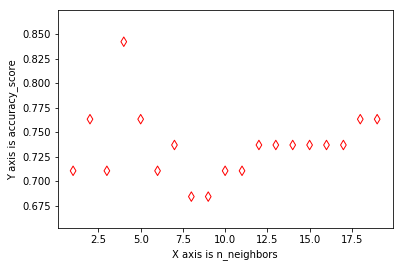

In [13]:
x=[]
for n_neighbors in range(1,20):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    score = accuracy_score(y_test,clf.predict(X_test))
    x.append([n_neighbors ,score]) 
num_x=np.array(x)
plt.xlabel('X axis is n_neighbors')
plt.ylabel('Y axis is accuracy_score')  
#plt.plot(num_x[:,0],num_x[:,1],'o',label="accuracy_score",markerfacecolor='r',markersize=10)
plt.scatter(num_x[:,0],num_x[:,1],marker='d',s=45,c='none',edgecolors='r')
plt.show()

In [14]:
def knn(n_neighbors,weights,X_data,y_data):
    '''
        class KNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                                    SupervisedIntegerMixin, ClassifierMixin):
            Parameters:
                n_neighbors:   默认邻居的数量
                weights：      权重
                    可选参数
                    uniform:    统一的权重. 在每一个邻居区域里的点的权重都是一样的。
                    distance:   权重点等于他们距离的倒数。使用此函数，更近的邻居对于所预测的点的影响更大
                    [callable]: 一个用户自定义的方法，此方法接收一个距离的数组，然后返回一个相同形状并且包含权重的数组。
                algorithm：    采用的算法
                    可选参数
                     ball_tree: 使用算法 BallTree
                     kd_tree:   使用算法 KDTree
                     brute:     使用暴力搜索
                     auto:      会基于传入fit方法的内容，选择最合适的算法。     
                p:              距离度量的类型
                metric：        树的距离矩阵
                metric_params： 矩阵参数
                n_jobs：        用于搜索邻居，可并行运行的任务数量
    '''
    # 创建 color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    
    # 绘制决策边界.为每一种对象分配一种颜色
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    #meshgrid函数用两个坐标轴上的点在平面上画网格。
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # 将结果放入颜色图中
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # 绘制训练数据集图片
    plt.scatter( X_data[:, 0], X_data[:, 1], c=y_data, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    plt.show()

In [20]:
n_neighbors=4
clf = KNeighborsClassifier(n_neighbors=n_neighbors)
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

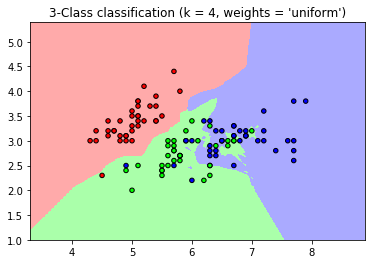

In [21]:
knn(n_neighbors,'uniform',X_train,y_train)

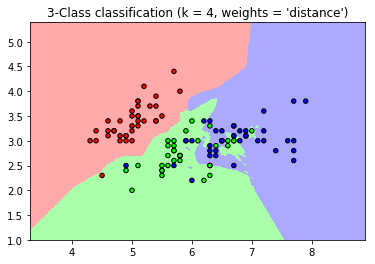

In [22]:
knn(n_neighbors,'distance',X_train,y_train)

预测其他点

In [23]:
y_pred=clf.predict(X_test)
print(y_pred)
print(y_test)
mistake=np.sum((y_pred==y_test)==False)
total=y_test.shape[0]
print("测试集样本总数：%d"%total)
print("错误分类样本总数：%d"%mistake)
print("正确分类率：%.2f"%float(1-mistake/total))

[1 1 0 2 0 2 0 1 1 2 2 2 2 1 1 0 1 1 0 0 1 1 0 0 2 0 0 1 1 0 2 1 0 1 2 1 0
 1]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]
测试集样本总数：38
错误分类样本总数：6
正确分类率：0.84


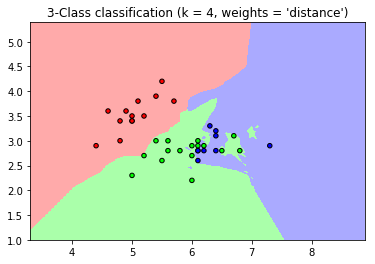

In [25]:
knn(n_neighbors,'distance',X_test,y_pred);